In [1]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading csv file
crime=pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
#basic information about data
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
#describe data
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
#checking null value
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
#checking duplicates 
crime.duplicated().sum()

0

In [8]:
#renaming column 
crime=crime.rename({'Unnamed: 0':'States'},axis=1)
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
#droping States column 
crime1=crime.drop('States',axis=1)
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


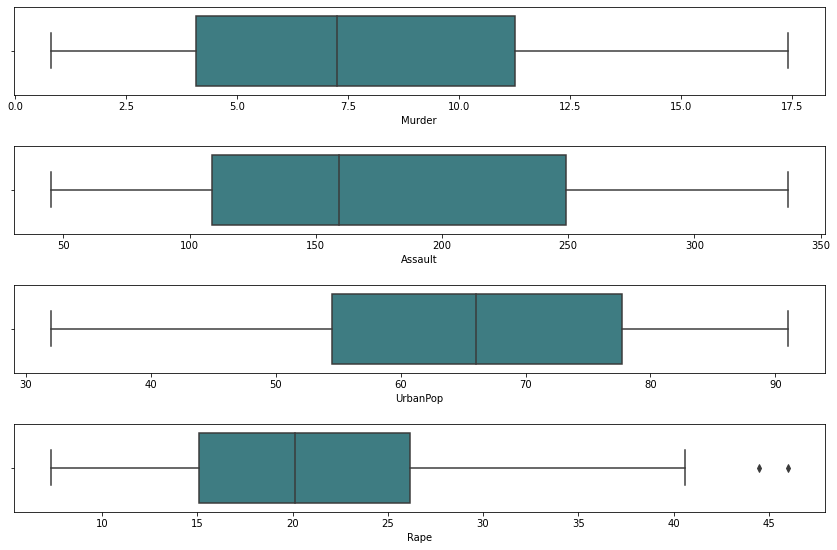

In [10]:
#outlier detection
ot=crime.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

Descriptive Statistics

In [11]:
#correlation
crime1.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


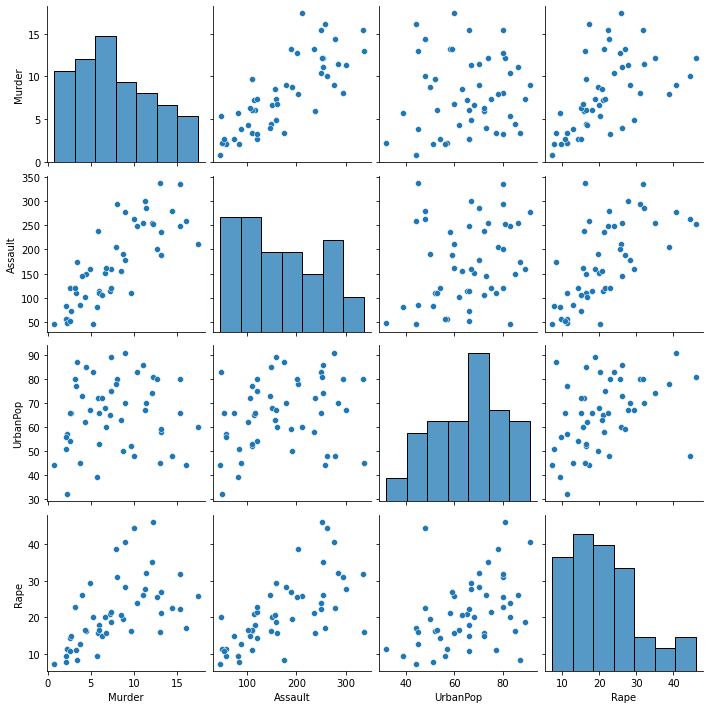

In [12]:
#pairplot
sns.pairplot(crime1)

In [13]:
#creating normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [14]:
#normalization function
norm_crime=norm_func(crime1)
norm_crime.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [15]:
norm_crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


# Hierarchical Clustering

In [16]:
#import necessary library for hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

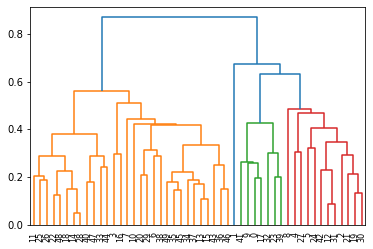

In [17]:
#create dendrogram
dendrogram=sch.dendrogram(sch.linkage(norm_crime,method='average'))

we are using silhoutte score to get optimum performace.

In [18]:
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(norm_crime)
        silhouette_score1 = silhouette_score(norm_crime, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958493

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3191691542812128
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185458

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.30607294424263076
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

Here the optimum silhouette score is 0.42364457559625074 for which number of cluster is 2,therefore choose number of cluster is equal to 2.

In [19]:
#create cluster
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
hc

AgglomerativeClustering(linkage='average')

In [20]:
y_hc=hc.fit_predict(norm_crime)

clusters=pd.DataFrame(y_hc,columns=['clusters'])
clusters

,clusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [21]:
#making copy of normalized crime data
data=norm_crime.copy()

data['clusterid']= clusters

In [22]:
data.sort_values('clusterid')

,Murder,Assault,UrbanPop,Rape,clusterid
0,0.746988,0.654110,0.440678,0.359173,0
42,0.716867,0.534247,0.813559,0.470284,0
41,0.746988,0.489726,0.457627,0.506460,0
39,0.819277,0.801370,0.271186,0.392765,0
32,0.734940,1.000000,0.220339,0.227390,0
31,0.620482,0.715753,0.915254,0.485788,0
30,0.638554,0.821918,0.644068,0.640827,0
27,0.686747,0.708904,0.830508,1.000000,0
23,0.921687,0.732877,0.203390,0.253230,0
21,0.680723,0.719178,0.711864,0.718346,0


In [23]:
data['clusterid'].value_counts()

1    30
0    20
Name: clusterid, dtype: int64

In [24]:
#making copy of crime data
data1=crime.copy()

data1['Agglo_Clusterid']= clusters

data1.head()

,States,Murder,Assault,UrbanPop,Rape,Agglo_Clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [25]:
data1.groupby('Agglo_Clusterid').agg(['mean']).reset_index()    

,Agglo_Clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165,255.250000,68.400000,29.165000
1,1,4.870,114.433333,63.633333,15.943333


Conclusion : As we have already known that there is a strong corelation between assault-murder and ther is moderate correlation between assault-rape and murder-rape, therefore 0 group has high average rate of crime.despite of having corrlation between variable the 1 group has lowest average rate of murder.so we can conclude that 1 group is safer than 0 group.

# K-Means Clustering

In [26]:
#importing library 
from sklearn.cluster import KMeans

we are using the same data set crime-data we used above for hierarchical clustering.

In [27]:
#crime data set
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [28]:
#normalized data
norm_crime.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


We get optimum number of clusters in kmeans by using Elbow method.
Elbow method uses WCSS. WCSS is defined as sum of the square distance between each member of the cluster and its centroid.This WCSS is measured for each value of k.The value of k,which has the least amount of WCSS,is taken as the optimum value.

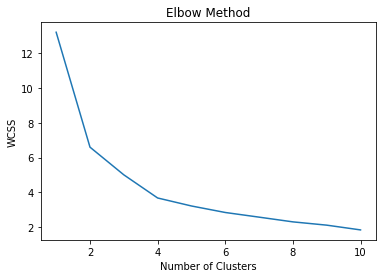

In [29]:
wcss = []
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(norm_crime)
    wcss.append(kmeans.inertia_)
  
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From above graph, we can seen that there is sharpe elbow for number of cluster is equal to 2 which tells us optimum number of clusters is equal to 2.

In [30]:
#create new clusters
new_cluster=KMeans(2,random_state=0)
new_cluster.fit(norm_crime)

KMeans(n_clusters=2, random_state=0)

In [31]:
new_cluster.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [32]:
new_cluster.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [33]:
#assign new_cluster to the data set
data2=crime.copy()
data2['Kmeans_clusterid']=new_cluster.labels_

In [34]:
data2.head()

,States,Murder,Assault,UrbanPop,Rape,Kmeans_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [35]:
data2.groupby('Kmeans_clusterid').agg(['mean']).reset_index()

,Kmeans_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


Conclusion :  Conclusion : As we have already known that there is a strong corelation between assault-murder and ther is moderate correlation between assault-rape and murder-rape, therefore 1 group has high average rate of crime.despite of having corrlation between variable the 0 group has lowest average rate of murder.so we can conclude that 0 group is safer than 0 group.

# DBSCAN Clustering

In [36]:
#importing necessary library
from sklearn.cluster import DBSCAN

In [37]:
#Using the same data as above 
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [38]:
#normalized crime data
norm_crime.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [39]:
#for selecting epsilon, using k-distance plot

#The idea is to calculate, the average of the distances of every point to its k nearest neighbors

#import library
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [48]:
#Calculate the average distance between each point in the data set and its 8 nearest neighbors (my selected MinPts value)

neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(norm_crime)
distances, indices = neighbors_fit.kneighbors(norm_crime)

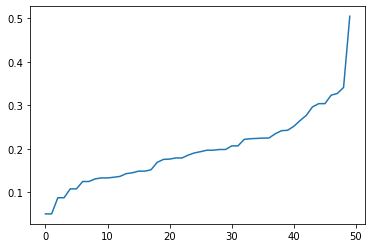

In [56]:
#Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:]
plt.plot(distances)

The optimal value for epsilon will be found at the point of maximum curvature.So here epsilon value will be 0.35


In [151]:
dbscan=DBSCAN(eps=0.36,min_samples=8)
dbscan.fit(norm_crime)

DBSCAN(eps=0.36, min_samples=8)

In [152]:
dbscan.labels_

#note- -1 value indicate an outlier.

array([ 0, -1,  1,  0, -1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [153]:
c1=pd.DataFrame(dbscan.labels_,columns=['dbscan_clusters'])

In [154]:
c1

,dbscan_clusters
0,0
1,-1
2,1
3,0
4,-1
5,1
6,1
7,1
8,-1
9,0


In [155]:
c1.value_counts()

dbscan_clusters
 1                 38
 0                  8
-1                  4
dtype: int64

In [156]:
data3=crime.copy()
d=pd.concat([data3,c1],axis=1)
d

,States,Murder,Assault,UrbanPop,Rape,dbscan_clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [157]:
d.groupby('dbscan_clusters').agg(['mean']).reset_index()

,dbscan_clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.850000,302.75,66.000000,33.275000
1,0,13.725000,239.00,56.500000,22.875000
2,1,6.110526,142.50,67.394737,19.618421


Conclusion : The group -1 has highest average rate of murder hence it is an outlier.the group 0 has 2nd highest average murder rate and assault rate with minimum average of rate urban population and group 1 has lowest average rate of murder with maximum rate of Urban population.Clearly group 1 is safer than other. 